<a href="https://colab.research.google.com/github/IA2021UR/trabajo-ia-en-la-comunidad-de-la-rioja-equipo-11/blob/main/Regresi%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Primer modelo

## Preparación del entorno de trabajo

Lo primero que vamos a hacer es preparar el entorno de trabajo. Para ello, descargaremos e importaremos las librerías necesarias:

Instalamos las librerías necesarias:

In [1]:
!pip install fastai --upgrade -q

     |████████████████████████████████| 204kB 9.1MB/s 
     |████████████████████████████████| 61kB 6.7MB/s 


Las importamos:

In [2]:
from fastai.vision.all import *
import os
import pandas as pd
from google.colab import files
from sklearn.model_selection import train_test_split
import shutil

Descargamos las imágenes:

In [3]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1WS7kotw0iuFxMpzGkiaNVWm8SLr_uNT4' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1WS7kotw0iuFxMpzGkiaNVWm8SLr_uNT4" -O datos.zip && rm -rf /tmp/cookies.txt
!unzip datos.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: data/11932.jpg          
  inflating: data/11933.jpg          
  inflating: data/11934.jpg          
  inflating: data/11935.jpg          
  inflating: data/11936.jpg          
  inflating: data/11937.jpg          
  inflating: data/11938.jpg          
  inflating: data/11939.jpg          
  inflating: data/1194.jpg           
  inflating: data/11940.jpg          
  inflating: data/11941.jpg          
  inflating: data/11942.jpg          
  inflating: data/11943.jpg          
  inflating: data/11944.jpg          
  inflating: data/11945.jpg          
  inflating: data/11946.jpg          
  inflating: data/11947.jpg          
  inflating: data/11948.jpg          
  inflating: data/1195.jpg           
  inflating: data/11954.jpg          
  inflating: data/11958.jpg          
  inflating: data/1196.jpg           
  inflating: data/11962.jpg          
  inflating: data/11963.jpg          
  inflating: data/11964.jpg

Una vez tenemos las imágenes, debemos descargar las etiquetas. Cada etiqueta se relaciona con su imagen correspondiente por un ID (el nombre de la imagen). Estas etiquetas son necesarias para poder entrenar nuestro modelo.

In [4]:
!wget https://www.dropbox.com/s/acezkcl7d1wfevz/LaRiojaEnLaMemoria.csv?dl=1 -O data.csv -q

Importamos los datos del CSV a un dataframe (usando pandas) para poder tratarlos.

In [5]:
df = pd.read_csv("data.csv")
df.head()

,ID_NUM,IDENT,TITULO,TITULAR,DESCRIPCION,PALABRAS_CLAVE,ANNO,LUGAR,LOCALIDAD,PROVINCIA,PAIS,PROVEEDOR
0,80,LRM-2008/00014-Imagen,Foto con los abuelos,Fotografía de los abuelos con la nieta de dos años en Hormilleja,NaN,NaN,1961,NaN,Hormilleja,NaN,NaN,NaN
1,81,LRM-2008/00015-Imagen,Madre e hijos en el Espolón,Madre e hijos en el Espolón,NaN,NaN,1961,NaN,Logroño,NaN,NaN,NaN
2,82,LRM-2008/00016-Imagen,SrTraspaderne,Severiano Traspaderne con su furgoneta Citroen 2CV de reparto de piensos,NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
3,83,LRM-2008/00017-Imagen,Invierno en moto,Sr Aragón y Sr García pertrechados para soportar el invierno en su motol (Rieju 125),NaN,NaN,1964,NaN,Logroño,NaN,NaN,NaN
4,84,LRM-2008/00018-Imagen,Empujando el microcoche,Empujando un BMW Isetta,NaN,NaN,1962,NaN,Logroño,NaN,NaN,NaN


## Separación en entrenamiento y test

Primero, creamos las carpetas:

In [7]:
path = Path('data')
trainPath = Path('data/train')
testPath = Path('data/test')

(path/'train').mkdir(parents=True,exist_ok=True)
(path/'test').mkdir(parents=True,exist_ok=True)

Antes de continuar, eliminamos las imágenes que no puedan ser tratadas por la librería:

In [ ]:
images = verify_images(get_image_files(path))
nDeleted = len(images)

for image in images:
  os.remove(str(image))

print(nDeleted)

0


Procedemos a separar las imágenes de forma aleatoria gracias a la función train_test_split:

In [21]:
trainImages, testImages = train_test_split(get_image_files(path),test_size=0.2,random_state=15)

In [22]:
for image in trainImages:
  shutil.move(str(image),path/('train/' + image.name))

for image in testImages:
  shutil.move(str(image),path/('test/' + image.name))

## Preparación del DataFrame para regresión

Una vez que hemos separado las imágenes en entrenamiento y test, vamos a crear un nuevo DataFrame en el que se relacione la ruta de la imagen con su año correspondiente de forma directa, para poder utilizarlo más adelante al crear el DataBlock.

Para cada una de las imágenes seleccionadas para entrenamiento, buscamos en el DataFrame inicial y le asignamos su año. Para ello, definimos una función que, dado el path de una imagen, nos devuelva su año asignado.



In [45]:
def getImageYearById(id):
  try:
    return df[df['ID_NUM'] == int(id)]['ANNO'].values[0]
  except:
    return -1

In [70]:
data = []

for image in trainImages:
  imageName = image.name
  imageYear = getImageYearById(image.stem)
  if imageYear != -1:
    data.append((imageName, imageYear))
  else:
    print('No data for image ' + str(imageName))

No data for image 33702.jpg
No data for image 33727.jpg
No data for image 34090.jpg
No data for image 38159.jpg
No data for image 33711.jpg
No data for image 34506.jpg
No data for image 35308.jpg
No data for image 35614.jpg
No data for image 35651.jpg
No data for image 35615.jpg
No data for image 33779.jpg
No data for image 42582.jpg
No data for image 37116.jpg
No data for image 42589.jpg
No data for image 35416.jpg
No data for image 35313.jpg
No data for image 33713.jpg
No data for image 34277.jpg
No data for image 37570.jpg
No data for image 33700.jpg
No data for image 42585.jpg
No data for image 42581.jpg
No data for image 33980.jpg
No data for image 31839.jpg
No data for image 42563.jpg
No data for image 28836.jpg
No data for image 42584.jpg
No data for image 42583.jpg
No data for image 42567.jpg
No data for image 34259.jpg
No data for image 33712.jpg
No data for image 37832.jpg
No data for image 35401.jpg
No data for image 33716.jpg
No data for image 42575.jpg
No data for image 33

Hay algunas imágenes sin información asociada, tal y como comprobamos al construir el modelo de clasificación. 

Finalmente, generamos el DataFrame a partir de la lista y obtenemos las imágenes y sus años por separado.

In [79]:
trainImagesDf = pd.DataFrame(data, columns=['path','year'])
trainImagesDf.head()

,path,year
0,30927.jpg,1932
1,30321.jpg,1972
2,34772.jpg,1955
3,10821.jpg,1959
4,26148.jpg,1941


In [80]:
X = ColReader('path', pref=trainPath)
Y = ColReader('year')

## Definición del DataBlock y el DataLoader

A continuación definiremos estos dos objetos necesarios para poder entrenar el modelo.

### DataBlock

El DataBlock es el objeto que, gracias a una serie de opciones que se especifican en su constructor, permite cargar las imágenes en el modelo mediante un DataLoader.

En esta ocasión, como vamos a hacer regresión, cambia ligeramente respecto a usos anteriores



In [81]:
dataBlock = DataBlock(blocks=(ImageBlock, RegressionBlock()),
                  get_x = X,
                  get_y = Y,
                  splitter=RandomSplitter(),
                  item_tfms=Resize(460, method='squish'),
                  batch_tfms=[*aug_transforms(size=224, max_warp=0)])

### DataLoader

A partir del DataBlock, construimos el DataLoader. Es importante asignar un batch que sea una potencia de 2 para optimizar el uso de la GPU.

In [82]:
dataLoader = dataBlock.dataloaders(trainImagesDf)

Mostramos una selección aleatoria de imágenes:

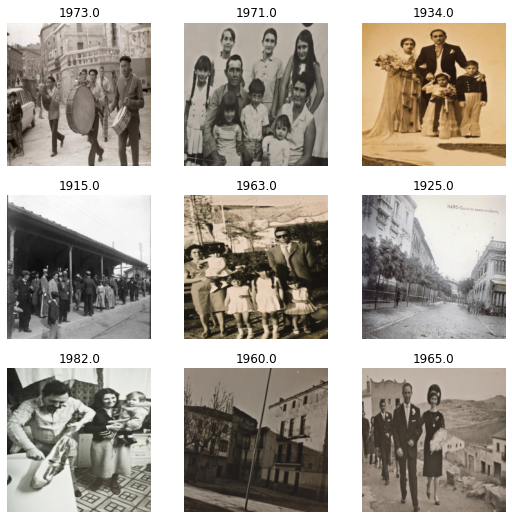

In [83]:
dataLoader.show_batch()

## Creación del modelo

Tal y como se explicó en el entregable 2, vamos a construir una red convolucional utilizando *transfer learning* con arquitectura ResNet 34.

In [ ]:
learn = cnn_learner(dataLoader,resnet18,metrics=accuracy).to_fp16()

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


### Entrenamiento de la red

Antes de entrenar el modelo, buscamos el mejor learning rate:

SuggestedLRs(lr_min=0.012022644281387329, lr_steep=0.005248074419796467)

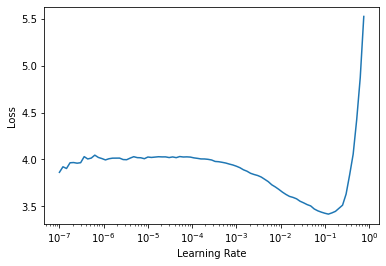

In [ ]:
learn.lr_find()

Siguiendo la metodología explicada [aquí](https://sgugger.github.io/how-do-you-find-a-good-learning-rate.html#how-do-you-find-a-good-learning-rate), 10^-2 es un buen valor del learning rate, en una posición anterior al punto de inflexión.

Utilizamos la funcionalidad de fine tune disponible en FastAI.

In [ ]:
learn.fine_tune(10,base_lr=10e-2)

epoch,train_loss,valid_loss,accuracy,time
0,3.324181,3.718700,0.281349,05:51


epoch,train_loss,valid_loss,accuracy,time
0,2.295481,18.496675,0.187566,05:50
1,2.005345,1.810670,0.345627,05:49
2,1.970736,nan,0.060063,05:51
3,1.923652,2.274153,0.277134,05:51
4,1.884020,1.587716,0.412013,05:50
5,1.797254,1.953000,0.308746,05:48
6,1.723020,1.691873,0.432034,05:50
7,1.645679,1.730690,0.360379,05:50
8,1.561047,1.525602,0.455216,05:49
9,1.480630,1.527446,0.433087,05:50


Lo exportamos para uso posterior:

In [ ]:
learn.export()

## Interpretación de los resultados

Creamos una interpretación para poder ver los resultados

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

Podemos visualizar la matriz de confusión, para ver cuántas veces ha acertado nuestro modelo.

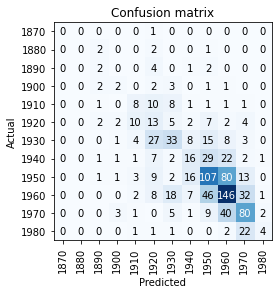

In [ ]:
interp.plot_confusion_matrix()

### Evaluación en el conjunto de test

Tenemos que crear nuevos objetos DataBlock Y DataLoader. El primero lo construiremos con un splitter concreto que nos permite especificar la base de datos de test

In [ ]:
dataBlockTest = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_image_files, 
                 splitter=GrandparentSplitter(valid_name='test'),
                 get_y=parent_label,
                 item_tfms = Resize(256),
                 batch_tfms=aug_transforms(size=128,min_scale=0.75))
dataLoaderTest = dataBlockTest.dataloaders(path,bs=128)

Modificamos el anterior learner:

In [ ]:
learn.dls = dataLoaderTest

Evaluamos el modelo mediante el método validate().

In [ ]:
learn.validate()

(#2) [2.2304768562316895,0.1812080591917038]

El resultado no es demasiado bueno, el modelo solo tiene un 0.18 de accuracy.